In [16]:
import cv2
import numpy as np
import pandas as pd
from skimage import filters
import skimage
import matplotlib.pyplot as plt 

In [17]:
def eval_img(img_fn, gt_fn):
    # reading base image
    bs = cv2.imread(img_fn, 1)
    bs = cv2.cvtColor(bs, cv2.COLOR_RGBA2BGR)
    bs = cv2.cvtColor(bs, cv2.COLOR_RGBA2GRAY)
    bs = cv2.GaussianBlur(bs, (5,5), 0)
    #display(Image(filename=img_fn))
    
    # reading ground truth
    bs_gt = cv2.imread(gt_fn, 1)
    bs_gt = cv2.cvtColor(bs_gt, cv2.COLOR_RGBA2BGR)
    bs_gt = cv2.cvtColor(bs_gt, cv2.COLOR_RGBA2GRAY)
    bs_gt = cv2.resize(bs_gt, (bs.shape[1],bs.shape[0]))
    bs_gt = bs_gt / bs_gt.max()
    #display(Image(filename=gt_fn))
    
    # LoG
    bs_lap = cv2.Laplacian(bs, cv2.CV_64F)
    bs_lap = bs_lap/bs_lap.max()
    # Sobel X
    bs_sob = cv2.Sobel(bs, cv2.CV_64F, 1, 0, ksize=5)
    bs_sob = bs_sob / bs_sob.max()
    # Canny
    bs_can = cv2.Canny(bs, 100, 200)
    bs_can = bs_can / bs_can.max()
    # Prewitt
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    bs_prew = cv2.filter2D(bs, -1, kernelx)
    bs_prew = bs_prew / bs_prew.max()
    # Roberts
    bs_rob = filters.roberts(bs)
    bs_rob = bs_rob / bs_rob.max()
    
    # evaluation - SSIM
    bs_ssim_lap = skimage.metrics.structural_similarity(bs_gt, bs_lap)
    bs_ssim_sob = skimage.metrics.structural_similarity(bs_gt, bs_sob)
    bs_ssim_can = skimage.metrics.structural_similarity(bs_gt, bs_can)
    bs_ssim_prew = skimage.metrics.structural_similarity(bs_gt, bs_prew)
    bs_ssim_rob = skimage.metrics.structural_similarity(bs_gt, bs_rob)
    
    # evaluation - PSNR
    #bs_psnr_lap = cv2.PSNR(bs_gt, bs_lap)
    #bs_psnr_sob = cv2.PSNR(bs_gt, bs_sob)
    #bs_psnr_can = cv2.PSNR(bs_gt, bs_can)
    #bs_psnr_prew = cv2.PSNR(bs_gt, bs_prew)
    #bs_psnr_rob = cv2.PSNR(bs_gt, bs_rob)

    # evaluation - MSE
    bs_mse_lap = np.square(np.subtract(bs_gt, bs_lap)).mean()
    bs_mse_sob = np.square(np.subtract(bs_gt, bs_sob)).mean()
    bs_mse_can = np.square(np.subtract(bs_gt, bs_can)).mean()
    bs_mse_prew = np.square(np.subtract(bs_gt, bs_prew)).mean()
    bs_mse_rob = np.square(np.subtract(bs_gt, bs_rob)).mean()
    
    DF = pd.DataFrame(
        columns = ['SSIM', 'MSE'], #'PSNR'],
        index = ['Laplacian', 'SobelX', 'Canny', 'Prewitt', 'Roberts'],
        data = [
            [bs_ssim_lap, bs_mse_lap], # bs_psnr_lap],
            [bs_ssim_sob, bs_mse_sob], # bs_psnr_sob],
            [bs_ssim_can, bs_mse_can], # bs_psnr_can],
            [bs_ssim_prew, bs_mse_prew], # bs_psnr_prew],
            [bs_ssim_rob, bs_mse_rob] #, bs_psnr_rob],  
        ]
    )
    
    return DF

In [18]:
# analysis

# Intel RealSense D455 Image Processing
RS_curve = eval_img('../test/testdata/intelRS_curve.jpg', '../test/testdata/intelRS_curve_gt.jpg')

RS_depth = eval_img('../test/testdata/intelRS_Depth.jpg','../test/testdata/intelRS_Depth_gt.jpg')

RS_HL = eval_img('../test/testdata/RS_HL.png','../test/testdata/RS_HL_gt.png')
RS_HL1 = eval_img('../test/testdata/RS_HL_1m.png','../test/testdata/RS_HL_1m_gt.png')
RS_HL5 = eval_img('../test/testdata/RS_HL_5m.png','../test/testdata/RS_HL_5m_gt.png')
RS_HL10 = eval_img('../test/testdata/RS_HL_10m.png','../test/testdata/RS_HL_10m_gt.png')

RS_LL = eval_img('../test/testdata/RS_LL.png','../test/testdata/RS_LL_gt.png')
RS_LL1 = eval_img('../test/testdata/RS_LL_1m.png','../test/testdata/RS_LL_1m_gt.png')
RS_LL5 = eval_img('../test/testdata/RS_LL_5m.png','../test/testdata/RS_LL_5m_gt.png')
RS_LL10 = eval_img('../test/testdata/RS_LL_10m.png','../test/testdata/RS_LL_10m_gt.png')

# Zed
Zed_curve = eval_img('../test/testdata/Zed_curve_crop.jpg', '../test/testdata/Zed_curve_crop_gt.jpg')

Zed_depth = eval_img('../test/testdata/Zed_depth_crop.jpg','../test/testdata/Zed_depth_crop_gt.jpg')

Zed_HL = eval_img('../test/testdata/Zed_HL.png','../test/testdata/Zed_HL_gt.png')
Zed_HL1 = eval_img('../test/testdata/Zed_HL_1m.png','../test/testdata/Zed_HL_1m_gt.png')
Zed_HL5 = eval_img('../test/testdata/Zed_HL_5m.png','../test/testdata/Zed_HL_5m_gt.png')
Zed_HL10 = eval_img('../test/testdata/Zed_HL_10m.png','../test/testdata/Zed_HL_10m_gt.png')

Zed_LL = eval_img('../test/testdata/Zed_LL.png','../test/testdata/Zed_LL_gt.png')
Zed_LL1 = eval_img('../test/testdata/Zed_LL_1m.png','../test/testdata/Zed_LL_1m_gt.png')
Zed_LL5 = eval_img('../test/testdata/Zed_LL_5m.png','../test/testdata/Zed_LL_5m_gt.png')
Zed_LL10 = eval_img('../test/testdata/Zed_LL_10m.png','../test/testdata/Zed_LL_10m_gt.png')

# Visualizations

##### OVERALL PERFORMANCE #####
# RS
RS_curve_sum = RS_curve.sum()
RS_depth_sum = RS_depth.sum()
RS_HL_sum = RS_HL.sum()
RS_HL1_sum = RS_HL1.sum()
RS_HL5_sum = RS_HL5.sum()
RS_HL10_sum = RS_HL10.sum() 
RS_LL_sum = RS_LL.sum()
RS_LL1_sum = RS_LL1.sum()
RS_LL5_sum = RS_LL5.sum()
RS_LL10_sum = RS_LL10.sum()

RS_SSIM_sums = [RS_curve_sum[0], RS_depth_sum[0], RS_HL_sum[0], RS_HL1_sum[0], RS_HL5_sum[0], 
 RS_HL10_sum[0], RS_LL_sum[0], RS_LL1_sum[0], RS_LL5_sum[0], RS_LL10_sum[0]]

RS_MSE_sums = [RS_curve_sum[1], RS_depth_sum[1], RS_HL_sum[1], RS_HL1_sum[1], RS_HL5_sum[1], 
 RS_HL10_sum[1], RS_LL_sum[1], RS_LL1_sum[1], RS_LL5_sum[1], RS_LL10_sum[1]]

# Zed
Zed_curve_sum = Zed_curve.sum()
Zed_depth_sum = Zed_depth.sum()
Zed_HL_sum = Zed_HL.sum()
Zed_HL1_sum = Zed_HL1.sum()
Zed_HL5_sum = Zed_HL5.sum()
Zed_HL10_sum = Zed_HL10.sum()
Zed_LL_sum = Zed_LL.sum()
Zed_LL1_sum = Zed_LL1.sum()
Zed_LL5_sum = Zed_LL5.sum()
Zed_LL10_sum = Zed_LL10.sum()

Zed_SSIM_sums = [Zed_curve_sum[0], Zed_depth_sum[0], Zed_HL_sum[0], Zed_HL1_sum[0], Zed_HL5_sum[0],
Zed_HL10_sum[0], Zed_LL_sum[0], Zed_LL1_sum[0], Zed_LL5_sum[0], Zed_LL10_sum[0]]

Zed_MSE_sums = [Zed_curve_sum[1], Zed_depth_sum[1], Zed_HL_sum[1], Zed_HL1_sum[1], Zed_HL5_sum[1],
Zed_HL10_sum[1], Zed_LL_sum[1], Zed_LL1_sum[1], Zed_LL5_sum[1], Zed_LL10_sum[1]]

# Plotting
labels = [
    'Curve', 'Depth', 'Highlight (w/o Cone)', 'Highlight (1m Cone)','Highlight (5m Cone)','Highlight (10m Cone)',
    'Lowlight (w/o Cone)', 'Lowlight (1m Cone)', 'Lowlight (5m Cone)', 'Lowlight (10m Cone)'
]

x = np.arange(len(labels))

width = .35 # width of bars

In [19]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

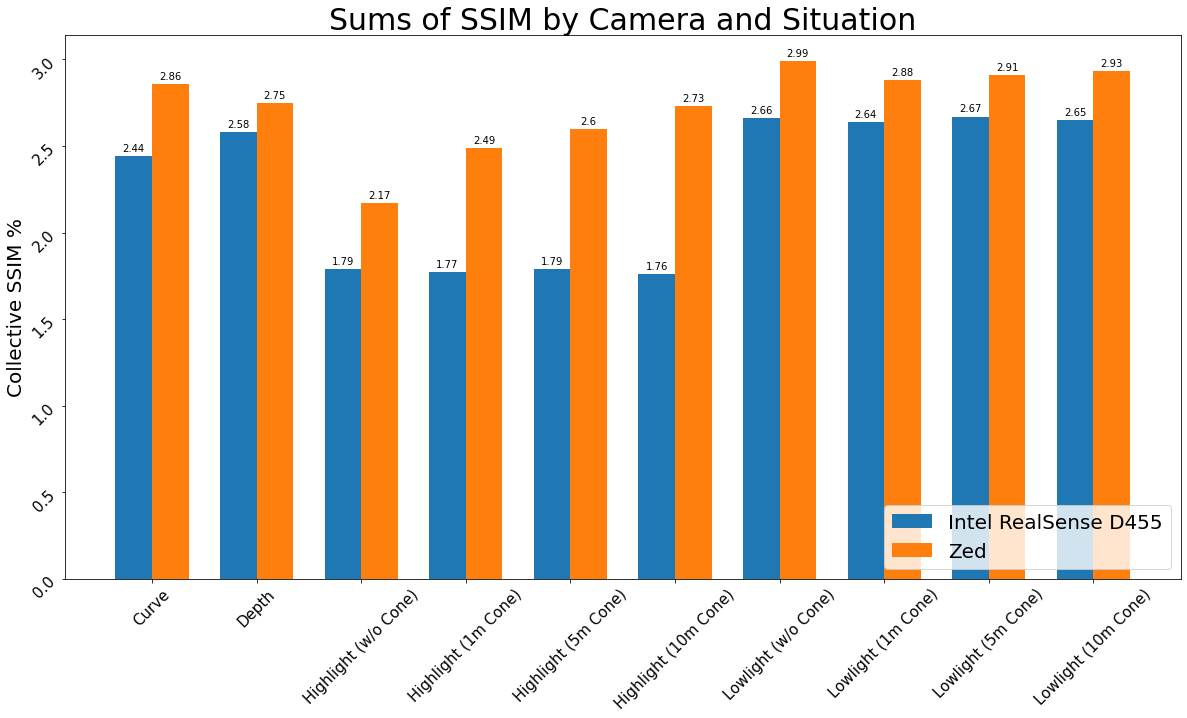

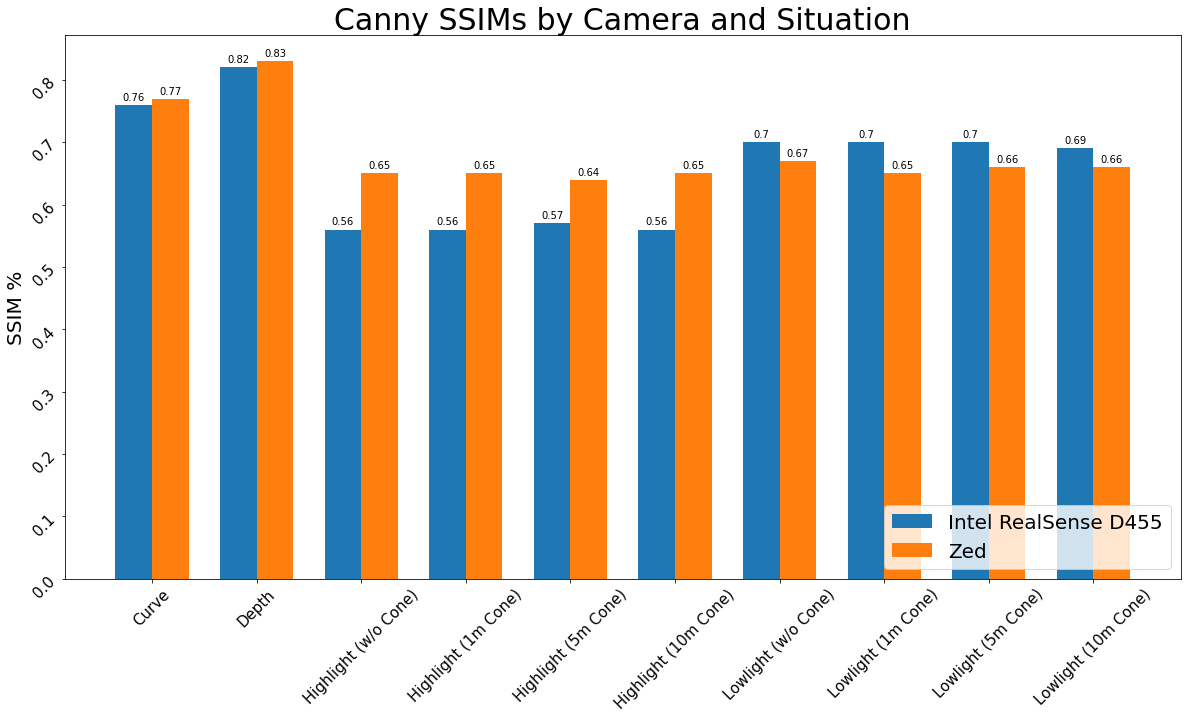

In [21]:
fig, ax = plt.subplots(figsize=(20,10))

RS_SSIM_sums = np.round(RS_SSIM_sums,2)
Zed_SSIM_sums = np.round(Zed_SSIM_sums, 2)

rects1 = ax.bar(x - width/2, RS_SSIM_sums, width, label='Intel RealSense D455')
rects2 = ax.bar(x + width/2, Zed_SSIM_sums, width, label='Zed')

ax.set_ylabel('Collective SSIM %', fontsize=20)
ax.set_title('Sums of SSIM by Camera and Situation', fontsize=30)
ax.set_xticks(x)
ax.tick_params(labelrotation=45, labelsize=15)
ax.set_xticklabels(labels)
ax.legend(loc=4, prop={'size':20})

autolabel(rects1)
autolabel(rects2)

##### Canny Performance #####
# Intel RealSense D455 
RS_curve_ssim = RS_curve.loc['Canny'][0]
RS_depth_ssim = RS_depth.loc['Canny'][0]
RS_HL_ssim = RS_HL.loc['Canny'][0]
RS_HL1_ssim = RS_HL1.loc['Canny'][0]
RS_HL5_ssim = RS_HL5.loc['Canny'][0]
RS_HL10_ssim = RS_HL10.loc['Canny'][0]
RS_LL_ssim = RS_LL.loc['Canny'][0]
RS_LL1_ssim = RS_LL1.loc['Canny'][0]
RS_LL5_ssim = RS_LL5.loc['Canny'][0]
RS_LL10_ssim = RS_LL10.loc['Canny'][0]

RS_c_ssim = [RS_curve_ssim,
RS_depth_ssim,
RS_HL_ssim,
RS_HL1_ssim,
RS_HL5_ssim,
RS_HL10_ssim,
RS_LL_ssim,
RS_LL1_ssim,
RS_LL5_ssim,
RS_LL10_ssim]

# Zed
Zed_curve_sum = Zed_curve.loc['Canny'][0]
Zed_depth_sum = Zed_depth.loc['Canny'][0]
Zed_HL_sum = Zed_HL.loc['Canny'][0]
Zed_HL1_sum = Zed_HL1.loc['Canny'][0]
Zed_HL5_sum = Zed_HL5.loc['Canny'][0]
Zed_HL10_sum = Zed_HL10.loc['Canny'][0]
Zed_LL_sum = Zed_LL.loc['Canny'][0]
Zed_LL1_sum = Zed_LL1.loc['Canny'][0]
Zed_LL5_sum = Zed_LL5.loc['Canny'][0]
Zed_LL10_sum = Zed_LL10.loc['Canny'][0]

Zed_c_ssim = [Zed_curve_sum,
Zed_depth_sum,
Zed_HL_sum,
Zed_HL1_sum,
Zed_HL5_sum,
Zed_HL10_sum,
Zed_LL_sum,
Zed_LL1_sum,
Zed_LL5_sum,
Zed_LL10_sum]

# Plotting

fig, ax = plt.subplots(figsize=(20,10))

RS_c_ssim = np.round(RS_c_ssim,2)
Zed_c_ssim = np.round(Zed_c_ssim, 2)

rects1 = ax.bar(x - width/2, RS_c_ssim , width, label='Intel RealSense D455')
rects2 = ax.bar(x + width/2, Zed_c_ssim, width, label='Zed')

ax.set_ylabel('SSIM %', fontsize=20)
ax.set_title('Canny SSIMs by Camera and Situation', fontsize=30)
ax.set_xticks(x)
ax.tick_params(labelrotation=45, labelsize=15)
ax.set_xticklabels(labels)
ax.legend(loc=4, prop={'size':20})

autolabel(rects1)
autolabel(rects2)
